# 无迹卡尔曼滤波器Unscented Kalman Filter
        本节主要介绍UKF这一滤波器，在书中介绍到，这一方法相比于EKF这一传统的非线性卡尔曼滤波器有诸多有点，比如说计算量的降低。因此，我本着做工程的需要，便没有过多研读EKF这一滤波器，有兴趣深入研究的同学，可以回到原著中一窥究竟，我就不讲了，哈哈哈哈哈~
        

### Comparetion  KF & UKF 
我们先给出这一方法的算法过程：
        
    先看UKF-KF对照表！！！

$$\begin{array}{l|l}
\textrm{Kalman Filter} & \textrm{Unscented Kalman Filter} & \\
\hline 
& \boldsymbol{\mathcal Y} = f(\boldsymbol\chi) & State Transition Function \\
\mathbf{\bar x} = \mathbf{Fx} & \mathbf{\bar x} = \sum w^m\boldsymbol{\mathcal Y} & StateEstimation \\
\mathbf{\bar P} = \mathbf{FPF}^\mathsf T+\mathbf Q  & \mathbf{\bar P} = \sum w^c({\boldsymbol{\mathcal Y} - \mathbf{\bar x})(\boldsymbol{\mathcal Y} - \mathbf{\bar x})^\mathsf T}+\mathbf Q \\
\hline 
& \boldsymbol{\mathcal Z} =  h(\boldsymbol{\mathcal{Y}}) & Measurement Function \\
& \boldsymbol\mu_z = \sum w^m\boldsymbol{\mathcal{Z}} & MeasurementEstimation \\
\mathbf y = \mathbf z - \mathbf{H\bar x} &
\mathbf y = \mathbf z - \boldsymbol\mu_z \\
\mathbf S = \mathbf{H\bar PH}^\mathsf{T} + \mathbf R & 
\mathbf P_z = \sum w^c{(\boldsymbol{\mathcal Z}-\boldsymbol\mu_z)(\boldsymbol{\mathcal{Z}}-\boldsymbol\mu_z)^\mathsf{T}} + \mathbf R \\ 
\mathbf K = \mathbf{\bar PH}^\mathsf T \mathbf S^{-1} &
\mathbf K = \left[\sum w^c(\boldsymbol{\mathcal Y}-\bar{\mathbf x})(\boldsymbol{\mathcal{Z}}-\boldsymbol\mu_z)^\mathsf{T}\right] \mathbf P_z^{-1} \\
\mathbf x = \mathbf{\bar x} + \mathbf{Ky} & \mathbf x = \mathbf{\bar x} + \mathbf{Ky}\\
\mathbf P = (\mathbf{I}-\mathbf{KH})\mathbf{\bar P} & \mathbf P = \bar{\mathbf P} - \mathbf{KP_z}\mathbf{K}^\mathsf{T}
\end{array}$$

### Predict Step

The UKF's predict step computes the prior using the process model $f()$. $f()$ is assumed to be nonlinear, so we generate sigma points $\mathcal{X}$ and their corresponding weights $W^m, W^c$
according to some function:

$$\begin{aligned}
\boldsymbol\chi &= \text{sigma-function}(\mathbf x, \mathbf P) \\
W^m, W^c &= \text{weight-function}(\mathtt{n, parameters})\end{aligned}$$

We pass each sigma point through $f(\mathbf x, \Delta t)$. This projects the sigma points forward in time according to the process model, forming the new prior, which is a set of sigma points we name $\boldsymbol{\mathcal Y}$:

$$\boldsymbol{\mathcal{Y}} = f(\boldsymbol{\chi}, \Delta t)$$

We compute the mean and covariance of the prior using the *unscented transform* on the transformed sigma points.  

$$\mathbf{\bar x}, \mathbf{\bar P} = 
UT(\mathcal{Y}, w_m, w_c, \mathbf Q)$$

These are the equations for the unscented transform:

$$\begin{aligned}
\mathbf{\bar x} &= \sum_{i=0}^{2n} w^m_i\boldsymbol{\mathcal Y}_i \\
\mathbf{\bar P} &= \sum_{i=0}^{2n} w^c_i({\boldsymbol{\mathcal Y}_i - \mathbf{\bar x})(\boldsymbol{\mathcal Y}_i-\mathbf{\bar x})^\mathsf{T}} + \mathbf Q
\end{aligned}
$$

This table compares the linear Kalman filter with the Unscented Kalman Filter equations. I've dropped the subscript $i$ for readability.

$$\begin{array}{l|l}
\text{Kalman} & \text{Unscented} \\
\hline 
& \boldsymbol{\mathcal Y} = f(\boldsymbol\chi) \\
\mathbf{\bar x} = \mathbf{Fx} & 
\mathbf{\bar x} = \sum w^m\boldsymbol{\mathcal Y}  \\
\mathbf{\bar P} = \mathbf{FPF}^\mathsf T + \mathbf Q  & 
\mathbf{\bar P} = \sum w^c({\boldsymbol{\mathcal Y} - \mathbf{\bar x})(\boldsymbol{\mathcal Y} - \mathbf{\bar x})^\mathsf T}+\mathbf Q
\end{array}$$

### Update Step

Kalman filters perform the update in measurement space. Thus we must convert the sigma points of the prior into measurements using a measurement function $h(x)$ that you define.

$$\boldsymbol{\mathcal{Z}} = h(\boldsymbol{\mathcal{Y}})$$

We compute the mean and covariance of these points using the unscented transform. The $z$ subscript denotes that these are the mean and covariance of the measurement sigma points.

$$\begin{aligned}
\boldsymbol\mu_z, \mathbf P_z &= 
UT(\boldsymbol{\mathcal Z}, w_m, w_c, \mathbf R) \\
\boldsymbol\mu_z &= \sum_{i=0}^{2n} w^m_i\boldsymbol{\mathcal Z}_i \\
\mathbf P_z &= \sum_{i=0}^{2n} w^c_i{(\boldsymbol{\mathcal Z}_i-\boldsymbol{\mu}_z)(\boldsymbol{\mathcal Z}_i-\boldsymbol{\mu}_z)^\mathsf T} + \mathbf R
\end{aligned}
$$

Next we compute the residual and Kalman gain. The residual of the measurement $\mathbf z$ is trivial to compute:

$$\mathbf y = \mathbf z - \boldsymbol\mu_z$$

To compute the Kalman gain we first compute the [cross covariance](https://en.wikipedia.org/wiki/Cross-covariance) of the state and the measurements, which is defined as: 

$$\mathbf P_{xz} =\sum_{i=0}^{2n} w^c_i(\boldsymbol{\mathcal Y}_i-\mathbf{\bar x})(\boldsymbol{\mathcal Z}_i-\boldsymbol\mu_z)^\mathsf T$$

And then the Kalman gain is defined as

$$\mathbf{K} = \mathbf P_{xz} \mathbf P_z^{-1}$$

If you think of the inverse as a *kind of* matrix reciprocal, you can see that the Kalman gain is a simple ratio which computes:

$$\mathbf{K} \approx \frac{\mathbf P_{xz}}{\mathbf P_z} 
\approx \frac{\text{belief in state}}{\text{belief in measurement}}$$

Finally, we compute the new state estimate using the residual and Kalman gain:

$$\mathbf x = \bar{\mathbf x} + \mathbf{Ky}$$

and the new covariance is computed as:

$$ \mathbf P = \mathbf{\bar P} - \mathbf{KP_z}\mathbf{K}^\mathsf{T}$$

This step contains a few equations you have to take on faith, but you should be able to see how they relate to the linear Kalman filter equations. The linear algebra is slightly different from the linear Kalman filter, but the algorithm is the same Bayesian algorithm we have been implementing throughout the book. 

怎么样，我们发现，其实UKF方法和KalmanFilter有着很多相似之处，可能唯一有出入的地方大概是每个状态的建立过程，其中包含了：$\bar x $ 、 $\bar P$ 、 $\mu_z$ 和 K。这些不同也几乎都最后指向了$w^m、w^c$是个什么鬼了。  
这里我就要对这两个权系数引入点介绍：这些权系数其实是作用在描述当下状态的几个sigma点上，通过对sigma点的状态加权而得到当下状态。  
那么，问题来了，**What is sigma point?**  
我们看个图：

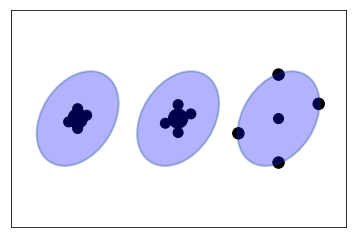

In [1]:
import kf_book.ukf_internal as ukf_internal
ukf_internal.show_sigma_selections()

这张图中，黑点就是sigma点，而椭圆表示的是这个状态位置的$1\sigma$分布，也即就是，sigma点就是为了更好的描述这个状态的位置分布而引入的点，这些点具有一定的对称性，在加权后能够更好的估计当前状态的位置。大概清楚了吗？书中有更详细的介绍，如果对这一部分不太清楚或者想更细的了解可以去书中看看更多的图。

These black points are sigma points, and the ellipse represents the $1\sigma$ distribution of this state position. In other words, the sigma point is the point introduced to better describe the positional distribution of this state. These points have a certain symmetry and can better estimate the position of the current state after weighting.

那么，sigma点是怎么得到的呢？  

Alors, comment s'est passé le point sigma?

### Sigma Points

The equations for the sigma points are:

$$
\begin{cases}
\mathcal{X}_0 = \mu \\
\mathcal{X}_i = \mu +  \left[\sqrt{(n+\lambda)\Sigma} \right]_i, & \texttt{for i=1..n} \\
\mathcal{X}_i = \mu - \left[\sqrt{(n+\lambda)\Sigma}\right]_{i-n} & \texttt{for i=(n+1)..2n}
\end{cases}
$$

The Python is not difficult once we understand the $\left[\sqrt{(n+\lambda)\Sigma}  \right]_i$ term.

The term $\sqrt{(n+\lambda)\Sigma}$ is a matrix because $\Sigma$ is a matrix. The subscript $i$ in $[\sqrt{(n+\lambda)\Sigma}]_i$ is choosing the column vector of the matrix. What is the square root of a matrix? There is no unique definition. One definition is that the square root of a matrix $\Sigma$ is the matrix $S$ that, when multiplied by itself, yields $\Sigma$: if  $\Sigma = SS$ then $S = \sqrt{\Sigma}$.

We will choose an alternative definition that has numerical properties which make it easier to compute. We can define the square root as the matrix S, which when multiplied by its transpose, returns $\Sigma$:

$$
\Sigma = \mathbf{SS}^\mathsf T
$$

This definition is favored because $\mathbf S$ is computed using the [*Cholesky decomposition*](https://en.wikipedia.org/wiki/Cholesky_decomposition) [3]. It decomposes a Hermitian, positive-definite matrix into a triangular matrix and its conjugate transpose. The matrix can be either upper 
or lower triangular, like so:

$$A=LL^{∗} \\ A=U^{∗}U$$

The asterick denotes the conjugate transpose; we have only real numbers so for us we can write:

$$A=LL^\mathsf T \\ A=U^\mathsf T U$$

$\mathbf P$ has these properties, so we can treat $\mathbf S = \text{cholesky}(\mathbf P)$ as the square root of $\mathbf P$.

SciPy provides `cholesky()` method in `scipy.linalg`. If your language of choice is Fortran, C, or C++, libraries such as LAPACK provide this routine. Matlab provides `chol()`.

By default `scipy.linalg.cholesky()` returns a upper triangular matrix, so I elected to write the code to expect an upper triangular matrix. If you provide your own square root implementation you will need to take this into account.

这里要提一点：  
这些参数对于**高斯情况Gaussian Noise**，应满足以下这些条件为好：  
>$\beta=2$ is a good choice for Gaussian problems, $\kappa=3-n$ where $n$ is the dimension of $\mathbf x$ is a good choice for $\kappa$, and $0 \le \alpha \le 1$ is an appropriate choice for $\alpha$, where a larger value for $\alpha$ spreads the sigma points further from the mean.

于是，我们就要引入这几个权系数的求解方法了。继续上原文！


### Weights

Computing the weights with NumPy is easy. Recall that the Van der Merwe scaled sigma point implementation states:

$$
\begin{aligned}
\lambda&=\alpha^2(n+\kappa)-n \\ 
W^m_0 &= \frac{\lambda}{n+\lambda} \\
W^c_0 &= \frac{\lambda}{n+\lambda} + 1 -\alpha^2 + \beta \\
W^m_i = W^c_i &= \frac{1}{2(n+\lambda)}\;\;\;i=1..2n
\end{aligned}
$$
    
Code for these is:

```python
lambda_ = alpha**2 * (n + kappa) - n
Wc = np.full(2*n + 1,  1. / (2*(n + lambda_))
Wm = np.full(2*n + 1,  1. / (2*(n + lambda_))
Wc[0] = lambda_ / (n + lambda_) + (1. - alpha**2 + beta)
Wm[0] = lambda_ / (n + lambda_)
```

I use the underscore in `lambda_` because `lambda` is a reserved word in Python. A trailing underscore is the Pythonic workaround.

在Dr.Rudolph Van der Merwe的努力下，给出了这样一个sigma点的获得的方法，我们将其也写成了一个类，在使用中我们可以直接指定对象point，从而完成上述所讲的权系数的确定和sigma点的确定的过程，方法如下：  
**Algorithme：**
``` python
from filterpy.kalman import MerweScaledSigmaPoints

points = MerweScaledSigmaPoints(n, alpha, beta, kappa, subtract=residual_x)
```
其中n是状态量的维度，$\alpha、\beta、\kappa$ 都是前文提到的参数

## Examp
接下来给一道例题：   
    
*Description:*  

    这是一辆小车，它在一个有着三个监测点的平面上受控运行，它的初始方向认定为x轴，它的初始位置认定为原点建立平面直角坐标系。小车在受控中，只可以大致控制小车的前进速度和前进方向。每个监测点只可以检测到小车大致距离和相对于它在坐标系下的方位角。已经给出了各个不确定性。先设计一个ukf滤波器来最优估计。  
    
    This is a small car that is controlled to operate on a plane with three monitoring points. Its initial orientation is identified as the x-axis and its initial position is determined by the origin to establish a plane Cartesian coordinate system. The trolley is under control and can only roughly control the forward speed and forward direction of the trolley. Each monitoring point can only detect the approximate distance of the cart and its azimuth relative to it in the coordinate system. Various uncertainties have been given. First design a ukf filter to optimize the estimate.

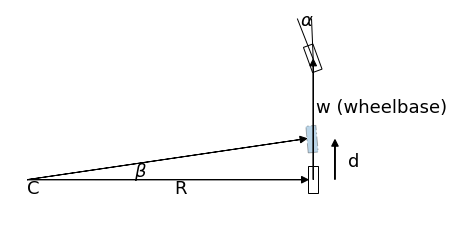

In [2]:
import kf_book.ekf_internal as ekf_internal
ekf_internal.plot_bicycle()


那么，一下是设计过程，在设计过程中的注释里面会一步一步的解释这个过程，可以不断浏览不断回顾之前学过的思想与方法，从而掌握ukf的方法。


In [1]:
from math import tan, sin, cos, sqrt, atan2

def move(x, u, dt, wheelbase):
    """    生成实际位置和方向的状态量，用于拟合出一组用于分析的测量量，现实中不存在。"""
    hdg = x[2]
    vel = u[0]
    steering_angle = u[1]
    dist = vel * dt

    if abs(steering_angle) > 0.001: # is robot turning?
        beta = (dist / wheelbase) * tan(steering_angle)
        r = wheelbase / tan(steering_angle) # radius

        sinh, sinhb = sin(hdg), sin(hdg + beta)
        cosh, coshb = cos(hdg), cos(hdg + beta)
        return x + np.array([-r*sinh + r*sinhb, 
                              r*cosh - r*coshb, beta])
    else: # moving in straight line
        return x + np.array([dist*cos(hdg), dist*sin(hdg), 0])

In [2]:
def normalize_angle(x):
    """ 用于处理转动的周期性，使超过2pi的角度自动正规回2pi内"""
    x = x % (2 * np.pi)    # force in range [0, 2 pi)
    if x > np.pi:          # move to [-pi, pi)
        x -= 2 * np.pi
    return x

In [3]:
def residual_h(a, b):
    y = a - b
    # data in format [dist_1, bearing_1, dist_2, bearing_2,...]
    for i in range(0, len(y), 2):
        y[i + 1] = normalize_angle(y[i + 1])
    return y

def residual_x(a, b):
    y = a - b
    y[2] = normalize_angle(y[2])
    return y

In [4]:
def fx(x, dt, u):
    """ 分别初步确定每个sigma点下一个状态的预估值，相当于KalmanFilter中的 X_bar = FX + Bu。不过还需要state_mean过程，对每个sigma点进行加权"""
    return move(x, u, dt, wheelbase)

In [5]:
def Hx(x, landmarks):
    """ 分别输入每个sigma点得到的状态预估值。
        输出：分别初步确定每个sigma点的这个新状态，相对于这组landmarks，测量时所需要描述的维度上的值，相当于KalmanFilter中的 HX_bar。
        不过还需要z_mean过程，对每个sigma点进行加权，
    """
    hx = []
    for lmark in landmarks:
        px, py = lmark
        dist = sqrt((px - x[0])**2 + (py - x[1])**2)
        angle = atan2(py - x[1], px - x[0])
        hx.extend([dist, normalize_angle(angle - x[2])])
    return np.array(hx)

In [6]:
def state_mean(sigmas, Wm):
    """ 对每个sigma点的状态预估值进行加权，最终确定下一状态的预估计值,即：KalmanFilter中的X_bar"""
    x = np.zeros(3)

    sum_sin = np.sum(np.dot(np.sin(sigmas[:, 2]), Wm))
    #print(sum_sin-np.dot(np.sin(sigmas[:, 2]), Wm))
    sum_cos = np.sum(np.dot(np.cos(sigmas[:, 2]), Wm))
    x[0] = np.sum(np.dot(sigmas[:, 0], Wm))
    x[1] = np.sum(np.dot(sigmas[:, 1], Wm))
    x[2] = atan2(sum_sin, sum_cos)
    return x

def z_mean(sigmas, Wm):
    """ 顺Hx()函数的结果，对每个sigma点加权，最终确定这一新状态，相对于这组landmarks，测量时所需要描述的维度上的值，即：KalmanFilter中的HX_bar"""
    z_count = sigmas.shape[1]
    x = np.zeros(z_count)

    for z in range(0, z_count, 2):
        sum_sin = np.sum(np.dot(np.sin(sigmas[:, z+1]), Wm))
        sum_cos = np.sum(np.dot(np.cos(sigmas[:, z+1]), Wm))

        x[z] = np.sum(np.dot(sigmas[:,z], Wm))
        x[z+1] = atan2(sum_sin, sum_cos)
    return x

In [14]:
from filterpy.stats import plot_covariance_ellipse
from numpy.random import random, randn

def run_localization(
    cmds, landmarks, sigma_vel, sigma_steer, sigma_range, sigma_bearing, ellipse_step=1, step=10):

## found the MSSP & UKF modle
    plt.figure()
    points = MerweScaledSigmaPoints(n=3, alpha=.00001, beta=2, kappa=0, 
                                    subtract=residual_x)  
                                      # 生成2n+1个sigma点，并生成对应每个sigma点的mean权系数W_m和covariance权系数W_c
                                      # n = dim_x, 0<=alpha<=1, beta = 2, kappa = 3-n
    ukf = UKF(dim_x=3, dim_z=2*len(landmarks), fx=fx, hx=Hx,
              dt=dt, points=points, x_mean_fn=state_mean, 
              z_mean_fn=z_mean, residual_x=residual_x, 
              residual_z=residual_h)  # 生成dim_x个状态变量，dim_z个测试变量，作用在sigma点集points上的UKF模型。
                                      # 其中由函数fx表达状态传递方程y=f(x)，由函数hx表达状态测量方程z=h(y)。
                                      # x_mean_fn表示状态变量期望μ(x)计算函数，即wm对y加权求和，也即：KalmanFilter中的X_bar；
                                      # z_mean_fn表示测试变量期望μ(z)计算函数，即wm对z加权求和，也即：KalmanFilter中的HX_bar。
                                      # residual_x和residual_z都是用来解决变量做差运算时出现的不合题设要求（如周期）的问题。

    ukf.x = np.array([2, 6, .3])      # 初始化状态量，分别为x、y位置量range和当前方向量bearing
    ukf.P = np.diag([.1, .1, .05])    # 初始化状态协方差，分别描述x、y、bearing各自独立方向方差
    ukf.R = np.diag([sigma_range**2, sigma_bearing**2]*len(landmarks))   # 描述len(landmarks)个标记点（测量点），各自测量测量的不准确性
    ukf.Q = np.eye(3)*0.0001        # 描述状态变量在变化过程中出现的过程不确定性
    
##
    sim_pos = ukf.x.copy()          # 对状态初值的浅层复制
    
    # plot landmarks
    if len(landmarks) > 0:
        plt.scatter(landmarks[:, 0], landmarks[:, 1], 
                    marker='s', s=60)
    
    # plot the points
    track, xs, covs, Qs = [], [], [], []
    for i, u in enumerate(cmds):     
        sim_pos = move(sim_pos, u, dt/step, wheelbase)           # 真实状态的记录，实际上不用。其目在于生成之后的测量值，而一般这是实际测量的
        track.append(sim_pos)

        if i % step == 0:       
            if i % ellipse_step == 0:
                plot_covariance_ellipse(
                    (ukf.x[0], ukf.x[1]), ukf.P[0:2, 0:2], std=6,
                     facecolor='k', alpha=0.3)

            [x, y, theta] = sim_pos                   
            z = []
            for lmark in landmarks:
                dx, dy = lmark[0] - x, lmark[1] - y
                d = sqrt(dx**2 + dy**2) + randn()*sigma_range   # 生成测量值中的目标距离测量点的距离
                bearing = atan2(lmark[1] - y, lmark[0] - x)
                a = normalize_angle(
                    bearing - theta + randn()*sigma_bearing)    # 生成测量值中的测量点-目标-原点之间的夹角
                z.extend([d, a])                                # creat the measurement variate
            ## ukf滤波器求解，也可以用ukf.batch_filter()函数
            ukf.predict(fx_args=u)                               # ukf.predict(u) 给一个输入的控制量，预估计一下接下来的状态
            ukf.update(z, hx_args=(landmarks,))                   # ukf.update(z)  再用一组各测量点贡献的测量值，后验估计这一新状态
            
            xs.append(ukf.x)
            covs.append(ukf.P)
            Qs.append(ukf.Q)
            
            if i % ellipse_step == 0:
                plot_covariance_ellipse(
                    (ukf.x[0], ukf.x[1]), ukf.P[0:2, 0:2], std=6,
                     facecolor='g', alpha=0.8)
                
    track = np.array(track)
    plt.plot(track[:, 0], track[:,1], color='k', lw=2)
    plt.axis('equal')
    plt.title("UKF Robot localization")  
    #Means, P, K = ukf.rts_smoother(np.asarray(xs), covs)  # 在这里我们无法使用，是由于fx()函数需要控制量u的输入，而rts_smoother需要fx()函数却不需要控制量u的输入，出现了矛盾。
    #ukf_internal.plot_rts_output(np.asarray(xs)[:,0], Means[:,0], range(200))
    plt.show()
    return ukf

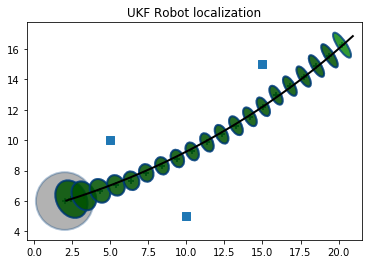

Final P: [ 0.00972677  0.0187833   0.00070503]


In [15]:
#format the book
%matplotlib inline
from __future__ import division, print_function
import kf_book.ukf_internal as ukf_internal
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import MerweScaledSigmaPoints
from filterpy.kalman import UnscentedKalmanFilter as UKF

dt = 1.0                                             # 采样时间
wheelbase = 0.5                                      # 汽车前后轮轴距
landmarks = np.array([[5, 10], [10, 5], [15, 15]])   # 给一组标定点位置，其实就是实际中观测对象的观测点，传感器的位置
cmds = [np.array([1.1, .01])] * 200                  # 给一组控制，其实就是实际中不断地输入控制量

ukf = run_localization(
    cmds, landmarks, sigma_vel=0.1, sigma_steer=np.radians(1), sigma_range=0.3, sigma_bearing=0.1)

print('Final P:', ukf.P.diagonal())

好了！大概就这样了，其实思想很简单，就是通过描述sigma点来优化对状态的描述，基本过程还是KalmanFilter那一套。